<a href="https://colab.research.google.com/github/chathurapriyashan/Intellihack_reid_coder_23_01/blob/main/Weather_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

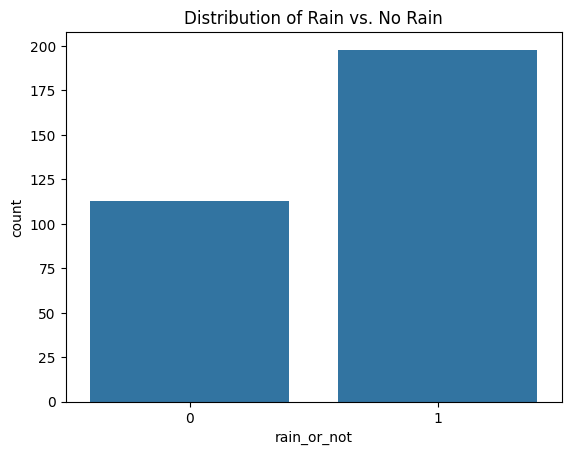

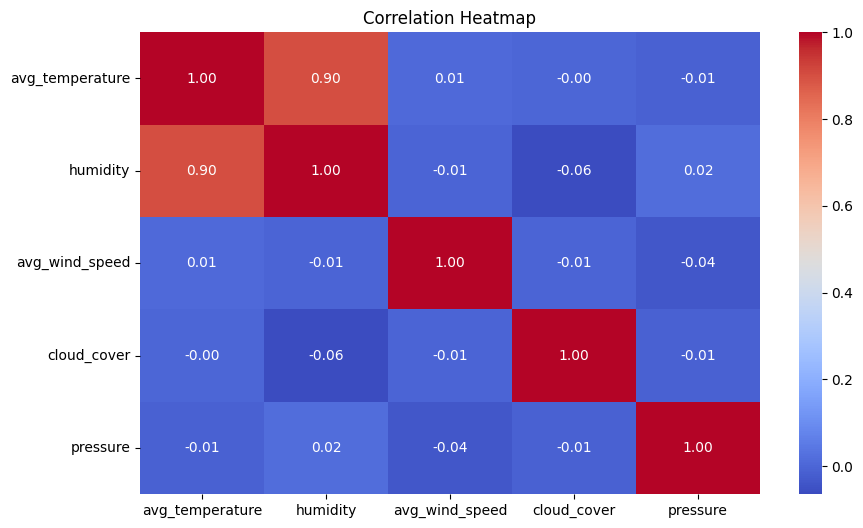

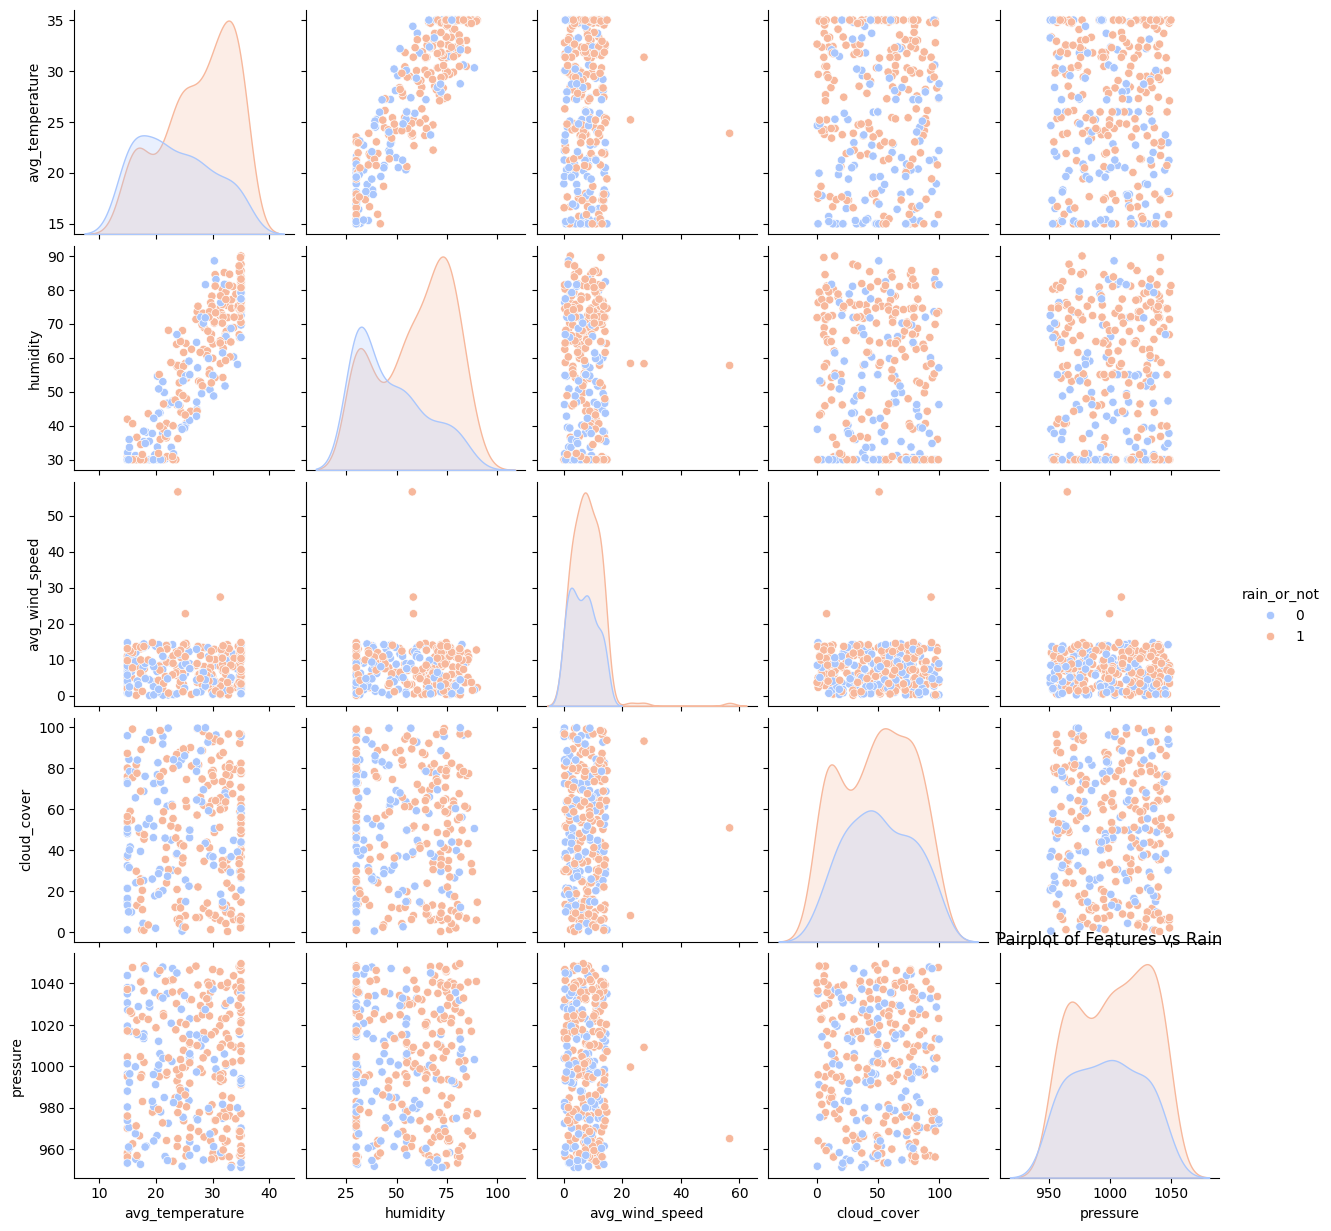

Logistic Regression Accuracy: 0.6825396825396826
Decision Tree Accuracy: 0.5396825396825397
Random Forest Accuracy: 0.5714285714285714
Gradient Boosting Accuracy: 0.49206349206349204
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.45      0.50        22
           1       0.73      0.80      0.77        41

    accuracy                           0.68        63
   macro avg       0.64      0.63      0.63        63
weighted avg       0.67      0.68      0.67        63

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.37      0.45      0.41        22
           1       0.67      0.59      0.62        41

    accuracy                           0.54        63
   macro avg       0.52      0.52      0.52        63
weighted avg       0.56      0.54      0.55        63

Random Forest Classification Report:
              precision    recall  f1-score   

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Data Preprocessing/ handle the non values data rows

#reading csv file
df = pd.read_csv("/content/weather_data.csv")

# Handle missing values using strategy='mean' it is middle state . i think
numeric_cols = df.select_dtypes(include=[np.number]).columns
imputer = SimpleImputer(strategy='mean')

# Impute missing values for numeric columns only
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])

#verify 0 or 1 (r or not r)
label_encoder = LabelEncoder()
df['rain_or_not'] = label_encoder.fit_transform(df['rain_or_not'])

# Split data into features and target variable
X = df[['avg_temperature', 'humidity', 'avg_wind_speed', 'cloud_cover', 'pressure']]
y = df['rain_or_not']

# divide the data set in to 2 part trainning part and testing part
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ffind  StandardScaler(kutikatha sangunakaya)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Visualize distribution of target variable ('rain_or_not')
sns.countplot(x='rain_or_not', data=df)
plt.title("Distribution of Rain vs. No Rain")
plt.show()

# Visualize the correlation between features
# Exclude non-numeric columns like 'rain_or_not' and 'date'
corr_matrix = df.drop(columns=['rain_or_not', 'date'], errors='ignore').corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Visualize relationships between features and target variable
sns.pairplot(df, hue='rain_or_not', palette="coolwarm")
plt.title("Pairplot of Features vs Rain")
plt.show()

# 3. Train and Evaluate Machine Learning Models

# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)
y_pred_log_reg = log_reg.predict(X_test_scaled)
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_log_reg)}")

# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)
y_pred_dt = dt.predict(X_test_scaled)
print(f"Decision Tree Accuracy: {accuracy_score(y_test, y_pred_dt)}")

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf)}")

# Gradient Boosting
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train_scaled, y_train)
y_pred_gb = gb.predict(X_test_scaled)
print(f"Gradient Boosting Accuracy: {accuracy_score(y_test, y_pred_gb)}")

# Classification Report for each model
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log_reg))

print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

print("Gradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_gb))

# 4. Hyperparameter Tuning and Feature Engineering

# Hyperparameter tuning using GridSearchCV for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=3, n_jobs=-1)
rf_grid_search.fit(X_train_scaled, y_train)

# Feature Engineering: Adding Polynomial Features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Train Random Forest model with polynomial features
rf_poly = RandomForestClassifier(random_state=42)
rf_poly.fit(X_train_poly, y_train)
y_pred_rf_poly = rf_poly.predict(X_test_poly)


# Final Output

# Predict rain probability using the Random Forest model
rain_probability = rf_poly.predict_proba(X_test_poly)[:, 1]

# Print the predicted probabilities for the first few test instances(21)
print(f"Rain probability for the test data (first 21): {rain_probability[:21]}")

# Convert the probability to binary prediction (0 = No Rain, 1 = Rain)
rain_prediction_binary = (rain_probability > 0.5).astype(int)
print(f"Rain predictions (binary): {rain_prediction_binary[:21]}")
